In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

/var/folders/h5/tvm1jcss2d97m4d__fmjzzjh0000gn/T/ipykernel_10388/2192646864.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


In [4]:
print(df.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


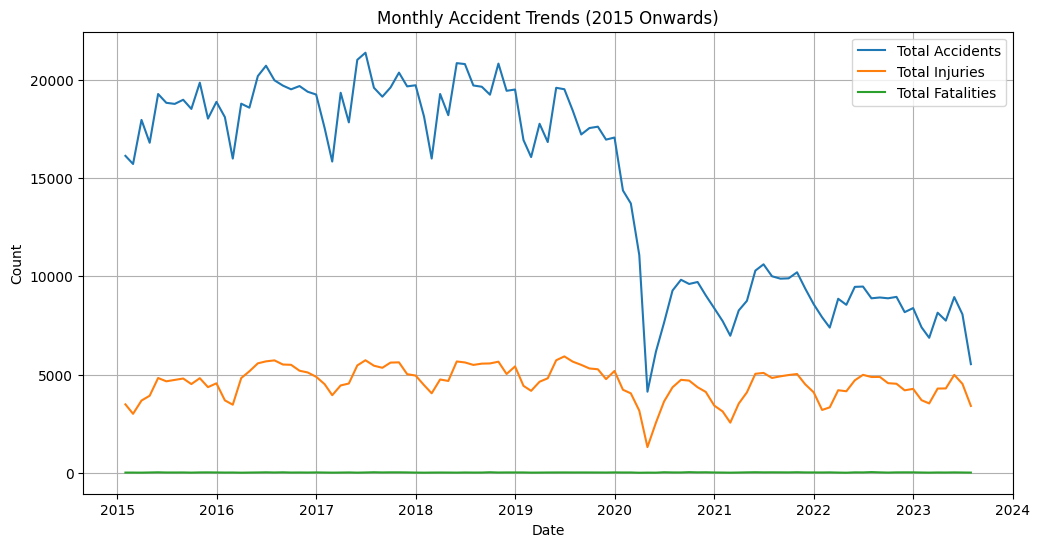

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a DataFrame called 'df'
# and 'ACCIDENT_DATE' column needs to be converted to a pandas datetime format.
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter data for accidents from 2015 onwards
df_post_implementation = df[df['CRASH DATE'].dt.year >= 2015]

# Create a new DataFrame with monthly accident data
monthly_accidents_post = df_post_implementation.groupby(pd.Grouper(key='CRASH DATE', freq='M')).size()
monthly_injuries_post = df_post_implementation.groupby(pd.Grouper(key='CRASH DATE', freq='M'))['NUMBER OF PERSONS INJURED'].sum()
monthly_fatalities_post = df_post_implementation.groupby(pd.Grouper(key='CRASH DATE', freq='M'))['NUMBER OF PERSONS KILLED'].sum()

# Convert the index of the DataFrames to datetime type
monthly_accidents_post.index = pd.to_datetime(monthly_accidents_post.index)
monthly_injuries_post.index = pd.to_datetime(monthly_injuries_post.index)
monthly_fatalities_post.index = pd.to_datetime(monthly_fatalities_post.index)

# Plot the time-series graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_accidents_post.index, monthly_accidents_post, label='Total Accidents')
plt.plot(monthly_injuries_post.index, monthly_injuries_post, label='Total Injuries')
plt.plot(monthly_fatalities_post.index, monthly_fatalities_post, label='Total Fatalities')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Accident Trends (2015 Onwards)')
plt.legend()
plt.grid(True)
plt.show()


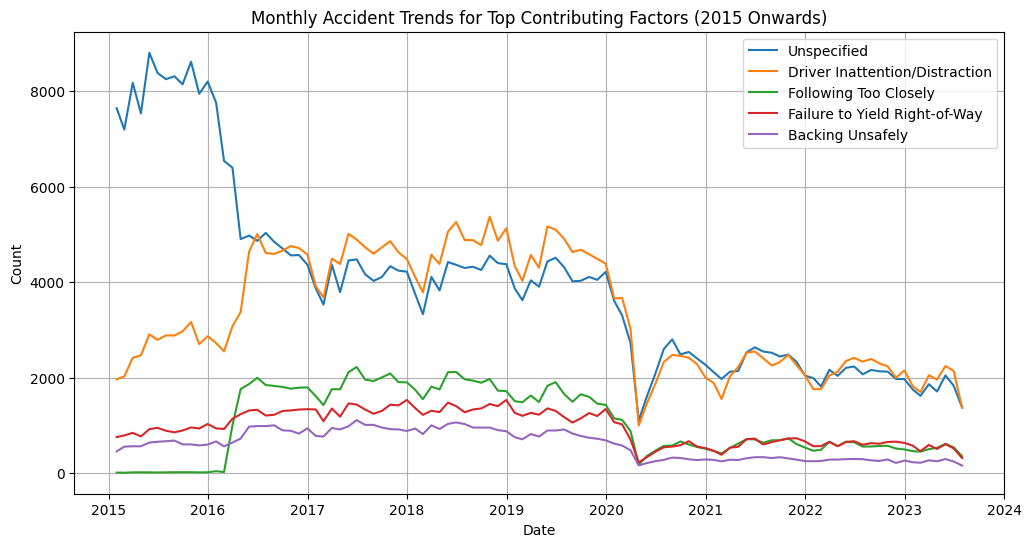

In [7]:
# Select the top contributing factors from 2015 onwards
top_contributing_factors_post = df_post_implementation['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(5).index.tolist()

# Create a DataFrame with monthly counts of each contributing factor from 2015 onwards
monthly_contributing_factors_post = df_post_implementation[
    df_post_implementation['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_contributing_factors_post)
].groupby(['CONTRIBUTING FACTOR VEHICLE 1', pd.Grouper(key='CRASH DATE', freq='M')]).size().unstack(0)

# Plot the time-series graph for each contributing factor
plt.figure(figsize=(12, 6))
for factor in top_contributing_factors_post:
    plt.plot(monthly_contributing_factors_post.index, monthly_contributing_factors_post[factor], label=factor)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Accident Trends for Top Contributing Factors (2015 Onwards)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import pandas as pd

# Assuming you have loaded the dataset into a DataFrame called 'df'
# and converted 'ACCIDENT_DATE' column to a pandas datetime format.
# If not, you can do it as follows:
# df['ACCIDENT_DATE'] = pd.to_datetime(df['ACCIDENT_DATE'])

# Filter data for accidents before and after 2014
df_pre_implementation = df[df['CRASH DATE'].dt.year < 2014]
df_post_implementation = df[df['CRASH DATE'].dt.year >= 2014]


In [9]:
# Assuming you have already prepared the pre-implementation (df_pre_implementation) and post-implementation (df_post_implementation) datasets.
# If not, refer to Step 1 in the previous response.

# Assign treatment and control labels to the datasets
df_pre_implementation['Control'] = 0
df_post_implementation['Treatment'] = 1

# Combine the datasets for DiD analysis
df_did = pd.concat([df_pre_implementation, df_post_implementation])

/var/folders/h5/tvm1jcss2d97m4d__fmjzzjh0000gn/T/ipykernel_10388/3755467846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_implementation['Control'] = 0
/var/folders/h5/tvm1jcss2d97m4d__fmjzzjh0000gn/T/ipykernel_10388/3755467846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_implementation['Treatment'] = 1


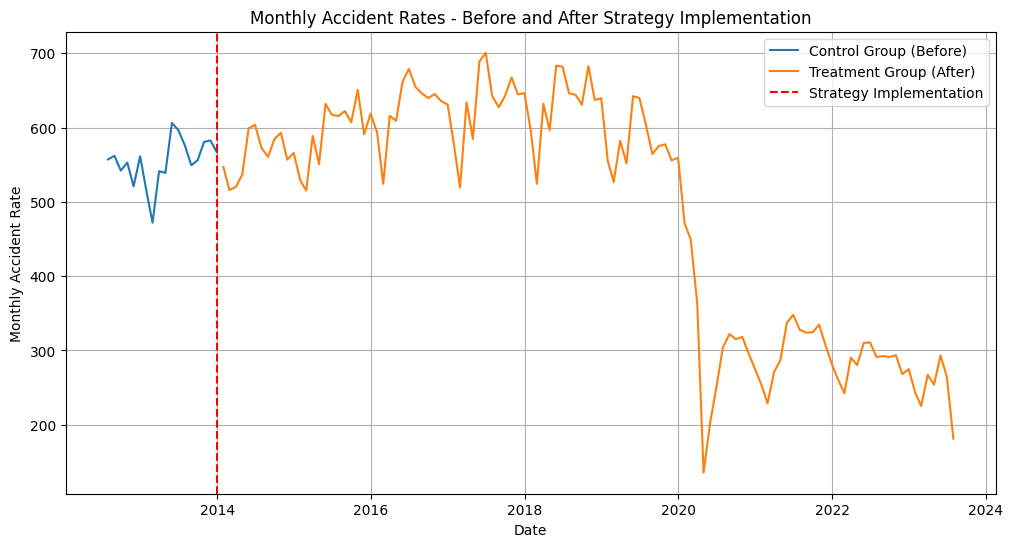

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already prepared the df_did DataFrame after the previous steps

# Split the dataset into treatment and control groups
df_treatment = df_did[df_did['Treatment'] == 1]
df_control = df_did[df_did['Control'] == 0]

# Calculate the monthly accident rates for the treatment and control groups
monthly_accident_rate_treatment = df_treatment.groupby(pd.Grouper(key='CRASH DATE', freq='M')).size() / 30.5
monthly_accident_rate_control = df_control.groupby(pd.Grouper(key='CRASH DATE', freq='M')).size() / 30.5

# Plot the changes in accident rates for the treatment and control groups before and after the implementation of the strategy
plt.figure(figsize=(12, 6))
plt.plot(monthly_accident_rate_control.index, monthly_accident_rate_control.values, label='Control Group (Before)')
plt.plot(monthly_accident_rate_treatment.index, monthly_accident_rate_treatment.values, label='Treatment Group (After)')

plt.axvline(pd.to_datetime('2014-01-01'), color='red', linestyle='--', label='Strategy Implementation')

plt.xlabel('Date')
plt.ylabel('Monthly Accident Rate')
plt.title('Monthly Accident Rates - Before and After Strategy Implementation')
plt.legend()
plt.grid(True)
plt.show()
